Tugas Konveksi Paksa Aliran Eksternal

Nama: Deedat Fatahillah \
NIM : 13320072

In [1]:
<img src=""

SyntaxError: invalid syntax (604761779.py, line 1)

In [122]:
Tic = 180+7+2   # Temperatur dalam pipa (Celcius) dengan menambahkan 3 digit NIM akhir
Tlc = 30 + 2    # Temperatur luar pipa (Celcius) dengan menambahkan 1 digit NIM akhir
Ti = Tic + 273  # Temperatur dalam pipa (Kelvin)
Tl = Tlc + 273  # Temperatur luar pipa (Kelvin)
V = 2           # m/s

In [123]:
import CoolProp.CoolProp as cp  # Import CoolProp untuk menghitung properti fluida
import numpy as np              # Import numpy 
import matplotlib.pyplot as plt # Import matplotlib untuk plotting

Persamaan-persamaan umum yang digunakan dapat ditulis sebagai berikut:

In [124]:
def Re(v, V, D): # Fungsi untuk menghitung angka Reynolds
    return (D * V) / v

def Nu(Re, Pr): # Fungsi untuk menghitung angka Nusselt
    return 0.3 + (0.62 * Re**0.5 * Pr**(1/3))/((1+(0.4/Pr)**(2/3))**0.25) * (1+(Re/282000)**(5/8))**(4/5)

def h(Nu, k, D): # Fungsi untuk menghitung nilai konveksi (h)
    return Nu * k / D

def Rc(r1, r2, k): # Fungsi untuk menghitung Resistansi konduksi
    return np.log(r2/r1) / (2 * np.pi * k)

def Rh(r2, h): # Fungsi untuk menghitung Resistansi konveksi
    return 1 / (2 * np.pi * h * (r2))

def Pr(Cp, k, mu): # Fungsi untuk menghitung angka Prandtl
    return Cp * mu / k

Hasil perhitungan tanpa menggunakan insulasi

In [137]:
# Informasi Pipa
wall = 10.31e-3 # ketebalan dinding pipa (m)
D2 = 323.8e-3   # diameter pipa (m)
D1 = D2-2*wall  # diameter dalam pipa (m)
r1 = D1/2       # jari-jari dalam pipa (m)
r2 = D2/2       # jari-jari pipa (m)

# Data Tabel A.1 
T_tabel = [300, 400 , 600, 800, 1000]
k_tabel = [60.5, 56.7487 , 48.0559 , 39.2685 , 30.01169]
k_pipe = np.interp(Ti, T_tabel, k_tabel) # Menentukan nilai konduktivitas pipa dengan interpolasi

Ts_prev= 0
Ts_new = Tl + 1 # inisialisasi suhu permukaan pipa

error = 1000
while error > 0.0001:
    error = abs(Ts_new - Ts_prev)
    Tf = (Ts_new + Tl) / 2 
    Pr = cp.PropsSI('Prandtl', 'T', Tf, 'P', 101325, 'Air') # Menghitung bilangan Prandtl dengan menggunakan Library CoolProp
    mu = cp.PropsSI('V', 'T', Tf, 'P', 101325, 'Air')       # Menghitung viskositas dengan menggunakan Library CoolProp
    rho = cp.PropsSI('D', 'T', Tf, 'P', 101325, 'Air')      # Menghitung densitas dengan menggunakan Library CoolProp
    k = cp.PropsSI('L', 'T', Tf, 'P', 101325, 'Air')        # Menghitung koefisien konduktivitas udara dengan menggunakan Library CoolProp
    v = mu / rho
    Re1 = Re(v, V, D2)
    Nu1 = Nu(Re1, Pr)
    h1 = h(Nu1, k, D2)
    Rk1 = Rc(r1, r2, k_pipe)
    Rh1 = Rh(r2, h1)
    Q = (Ti - Tl)/ (Rk1 + Rh1)
    Ts_prev = Ts_new
    Ts_new = Q*Rh1 + Tl
print('Temperatur di permukaan pipa: ', Ts_new-273, 'C')
print('Kalor yang dilepaskan per panjang: ', Q, 'W/m')

Temperatur di permukaan pipa:  188.712273917081 C
Kalor yang dilepaskan per panjang:  1485.1310266920996 W/m


Dengan Insulasi 

In [ ]:
# Informasi Pipa
wall = 10.31e-3 # ketebalan dinding pipa (m)
D2 = 323.8e-3   # diameter pipa (m)
D1 = D2-2*wall  # diameter dalam pipa (m)
r1 = D1/2       # jari-jari dalam pipa (m)
r2 = D2/2       # jari-jari pipa (m)

# Informasi insulator
widthI = 1*0.0254 # Ketebalan insulasi (m)
kI = 
# Informasi Cladding
widthC = 2*0.0254 # Ketebalan cladding (m)

# Data Tabel A.1 
T_tabel = [300, 400 , 600, 800, 1000]
k_tabel = [60.5, 56.7487 , 48.0559 , 39.2685 , 30.01169]
k_pipe = np.interp(Ti, T_tabel, k_tabel) # Menentukan nilai konduktivitas pipa dengan interpolasi

Rp = np.log(r2/r1) / (2 * np.pi * k_pipe) # Menghitung resistansi konduksi pipa


Regresi Data Tabel A.4

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('tabel-a4.csv')    # Membaca data dari tabel-a4.csv
x = df['T'].values                  # Mengambil data kolom T
y = df['rho'].values                # Mengambil data kolom rho

error = []
# Regresi Polinomial
for i in range(1):
    z = np.polyfit(x, y, i)
    p = np.poly1d(z)
    xp = np.linspace(100, x[len(x)-1], 1000)
    for j in range(len(x)):
        error.append(abs(y[j]-p(x[j])))
    print(error)
'''    plt.plot(x, y, color='blue')
    plt.plot(xp, p(xp), color = 'red')
    plt.title('Regresi Polynomial Orde '+str(i))
    plt.show()
    break'''

[2.63095, 1.4111499999999997, 0.8205499999999999, 0.4694499999999999, 0.23614999999999986, 0.06974999999999987, 0.05415000000000014, 0.1512500000000001, 0.2288500000000001, 0.2923500000000001, 0.3448500000000001, 0.38965000000000016, 0.42775000000000013, 0.46095000000000014, 0.4898500000000001, 0.5155500000000002, 0.5384500000000001, 0.5586500000000001, 0.5770500000000001, 0.6086500000000001]


"    plt.plot(x, y, color='blue')\n    plt.plot(xp, p(xp), color = 'red')\n    plt.title('Regresi Polynomial Orde '+str(i))\n    plt.show()\n    break"

Regresi Data Tabel A.1

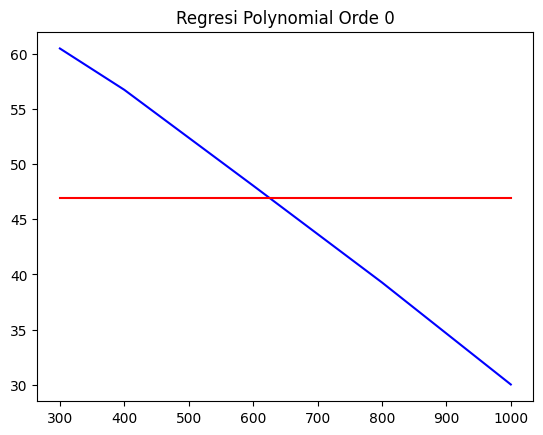

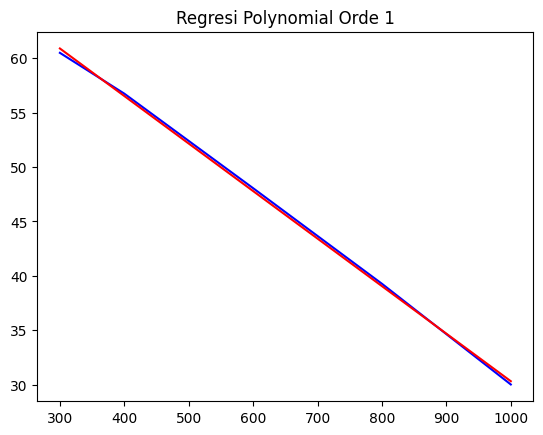

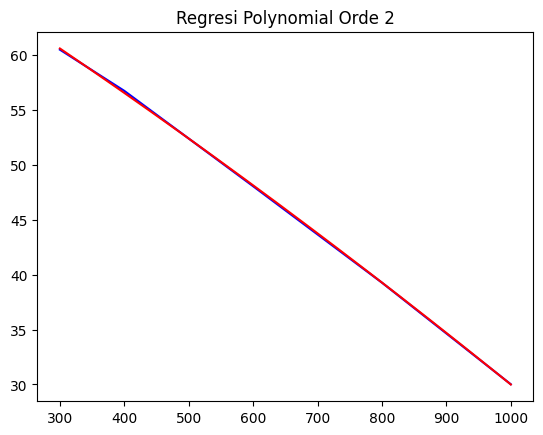

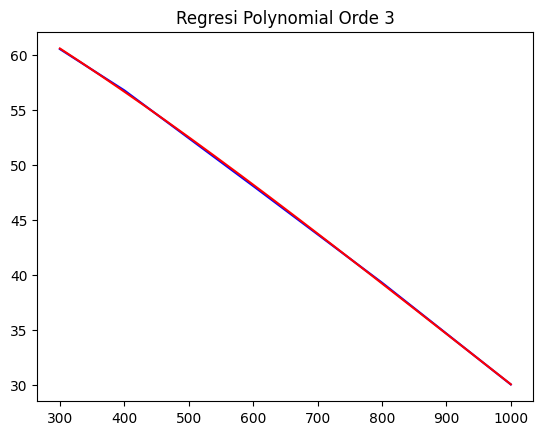

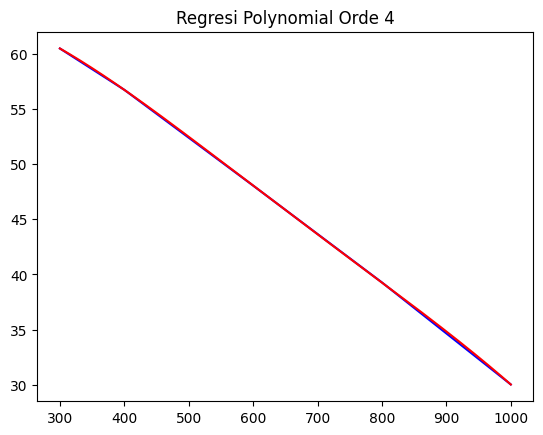

In [5]:
# Data Tabel A.1 
T_tabel = [300, 400 , 600, 800, 1000]
k_tabel = [60.5, 56.7487 , 48.0559 , 39.2685 , 30.01169]

for i in range(5):
    z = np.polyfit(T_tabel,k_tabel , i)
    
    p = np.poly1d(z)
    
    xp = np.linspace(300, T_tabel[len(T_tabel)-1], 1000)
    plt.plot(T_tabel, k_tabel, color='blue')
    plt.plot(xp, p(xp), color = 'red')
    plt.title('Regresi Polynomial Orde '+str(i))
    plt.show()

[1.032 1.012 1.007 1.006 1.007 1.009 1.014 1.021 1.03  1.04  1.051 1.063
 1.075 1.087 1.099 1.11  1.121 1.131 1.141 1.159]
